In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_plain_data(data_dir):
    """
    Loads plain implementation CSV files and computes statistics
    """
    csv_pattern = data_dir + "/sender_results_*.csv"
    csv_files = sorted(glob.glob(csv_pattern))

    stats = {
        "num_records": [],
        "intersection_avg": [],
        "intersection_std": [],
        "total_avg": [],
        "total_std": []
    }

    for file in csv_files:
        try:
            df = pd.read_csv(file)
            if df.empty:
                continue

            # Extract number of records from filename
            num = int(file.split("_")[-1].split(".")[0])
            stats["num_records"].append(num)

            # Compute statistics
            stats["intersection_avg"].append(df["intersection_time"].mean())
            stats["intersection_std"].append(df["intersection_time"].std())
            stats["total_avg"].append(df["total_runtime"].mean())
            stats["total_std"].append(df["total_runtime"].std())

        except Exception as e:
            print(f"Error reading {file}: {e}")
            continue

    if len(stats["num_records"]) > 0:
        # Sort all arrays by num_records
        sorted_indices = np.argsort(stats["num_records"])
        for key in stats:
            stats[key] = np.array(stats[key])[sorted_indices]

    return stats


In [3]:
def load_sgx_data(data_dir):
    """
    Loads SGX implementation CSV files and computes statistics
    """
    csv_pattern = data_dir + "/size_*.csv"
    csv_files = sorted(glob.glob(csv_pattern))

    stats = {
        "num_records": [],
        "intersection_avg": [],
        "intersection_std": [],
        "total_avg": [],
        "total_std": []
    }

    for file in csv_files:
        try:
            df = pd.read_csv(file)
            if df.empty:
                continue

            # Extract number of records from filename
            num = int(file.split("_")[-1].split(".")[0])
            stats["num_records"].append(num)

            # Compute statistics
            stats["intersection_avg"].append(df["IntersectionTime_ms"].mean())
            stats["intersection_std"].append(df["IntersectionTime_ms"].std())
            stats["total_avg"].append(df["TotalRuntime_ms"].mean())
            stats["total_std"].append(df["TotalRuntime_ms"].std())

        except Exception as e:
            print(f"Error reading {file}: {e}")
            if 'df' in locals():
                print(f"Available columns: {df.columns.tolist()}")
            continue

    if len(stats["num_records"]) > 0:
        # Sort all arrays by num_records
        sorted_indices = np.argsort(stats["num_records"])
        for key in stats:
            stats[key] = np.array(stats[key])[sorted_indices]

    return stats


In [4]:
def load_gramine_data(data_dir):
    """
    Loads Gramine implementation CSV files and computes statistics
    """
    csv_pattern = data_dir + "/sender_results_*.csv"
    csv_files = sorted(glob.glob(csv_pattern))

    stats = {
        "num_records": [],
        "intersection_avg": [],
        "intersection_std": [],
        "total_avg": [],
        "total_std": []
    }

    for file in csv_files:
        try:
            df = pd.read_csv(file)
            if df.empty:
                continue

            # Extract number of records from filename
            num = int(file.split("_")[-1].split(".")[0])
            stats["num_records"].append(num)

            # Compute statistics
            stats["intersection_avg"].append(df["intersection_time"].mean())
            stats["intersection_std"].append(df["intersection_time"].std())
            stats["total_avg"].append(df["total_runtime"].mean())
            stats["total_std"].append(df["total_runtime"].std())

        except Exception as e:
            print(f"Error reading {file}: {e}")
            if 'df' in locals():
                print(f"Available columns: {df.columns.tolist()}")
            continue

    if len(stats["num_records"]) > 0:
        # Sort all arrays by num_records
        sorted_indices = np.argsort(stats["num_records"])
        for key in stats:
            stats[key] = np.array(stats[key])[sorted_indices]

    return stats


In [5]:
# Load data from both implementations
plain_data = load_plain_data("./plain_data")
sgx_data = load_sgx_data("./sgx_data")
gramine_data = load_gramine_data("./gramine")

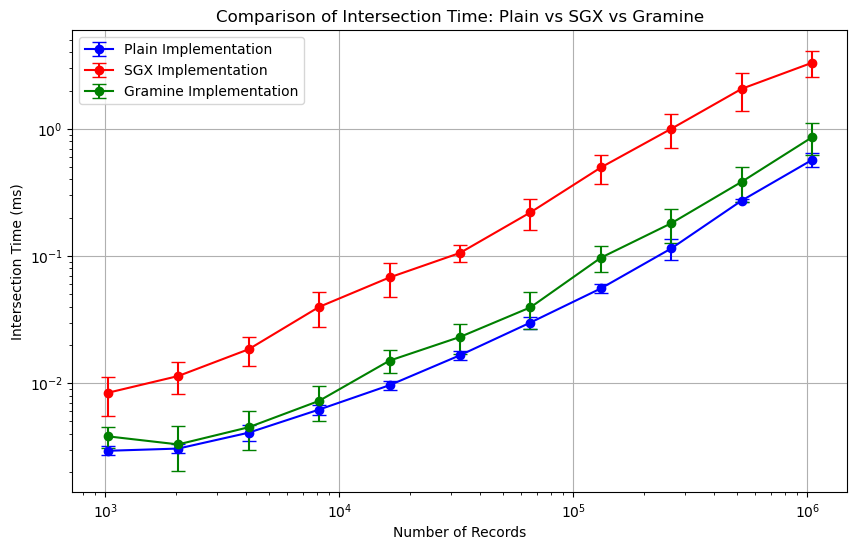

In [6]:
# Plot 1: Intersection Time Comparison
plt.figure(figsize=(10, 6))

# Plain implementation
plt.errorbar(plain_data["num_records"], plain_data["intersection_avg"],
             yerr=plain_data["intersection_std"],
             fmt='o-', capsize=5, label='Plain Implementation', color='blue')

# SGX implementation
plt.errorbar(sgx_data["num_records"], sgx_data["intersection_avg"],
             yerr=sgx_data["intersection_std"],
             fmt='o-', capsize=5, label='SGX Implementation', color='red')

# Gramine implementation
plt.errorbar(gramine_data["num_records"], gramine_data["intersection_avg"],
             yerr=gramine_data["intersection_std"],
             fmt='o-', capsize=5, label='Gramine Implementation', color='green')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Records')
plt.ylabel('Intersection Time (ms)')
plt.title('Comparison of Intersection Time: Plain vs SGX vs Gramine')
plt.legend()
plt.grid(True)
plt.show()

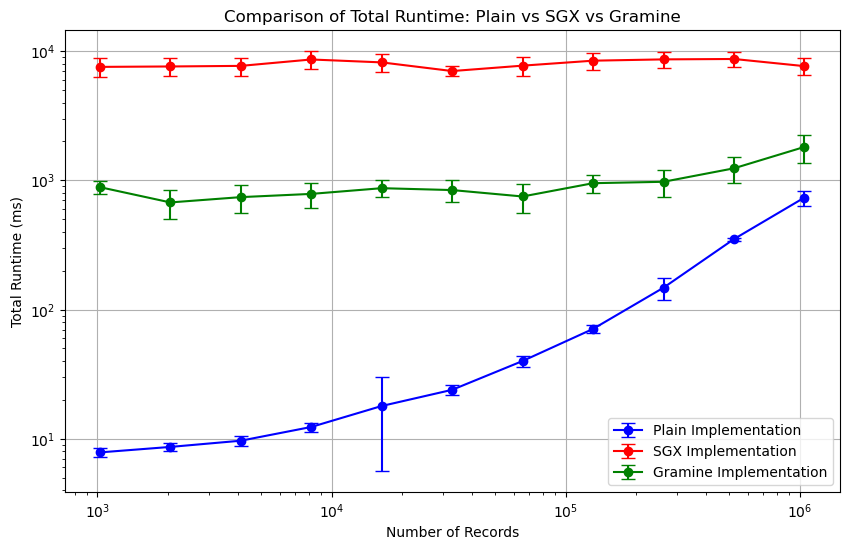

In [7]:
# Plot 2: Total Runtime Comparison
plt.figure(figsize=(10, 6))

# Plain implementation
plt.errorbar(plain_data["num_records"], plain_data["total_avg"],
             yerr=plain_data["total_std"],
             fmt='o-', capsize=5, label='Plain Implementation', color='blue')

# SGX implementation
plt.errorbar(sgx_data["num_records"], sgx_data["total_avg"],
             yerr=sgx_data["total_std"],
             fmt='o-', capsize=5, label='SGX Implementation', color='red')

# Gramine implementation
plt.errorbar(gramine_data["num_records"], gramine_data["total_avg"],
             yerr=gramine_data["total_std"],
             fmt='o-', capsize=5, label='Gramine Implementation', color='green')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Records')
plt.ylabel('Total Runtime (ms)')
plt.title('Comparison of Total Runtime: Plain vs SGX vs Gramine')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Update summary statistics to include Gramine
print("\nSummary Statistics:")
print("==================")
print("\nPlain Implementation:")
print(f"Number of data points: {len(plain_data['num_records'])}")
print(f"Average intersection time range: {min(plain_data['intersection_avg']):.2f} - {max(plain_data['intersection_avg']):.2f} ms")
print(f"Average total runtime range: {min(plain_data['total_avg']):.2f} - {max(plain_data['total_avg']):.2f} ms")

print("\nSGX Implementation:")
print(f"Number of data points: {len(sgx_data['num_records'])}")
print(f"Average intersection time range: {min(sgx_data['intersection_avg']):.2f} - {max(sgx_data['intersection_avg']):.2f} ms")
print(f"Average total runtime range: {min(sgx_data['total_avg']):.2f} - {max(sgx_data['total_avg']):.2f} ms")

print("\nGramine Implementation:")
print(f"Number of data points: {len(gramine_data['num_records'])}")
print(f"Average intersection time range: {min(gramine_data['intersection_avg']):.2f} - {max(gramine_data['intersection_avg']):.2f} ms")
print(f"Average total runtime range: {min(gramine_data['total_avg']):.2f} - {max(gramine_data['total_avg']):.2f} ms")


Summary Statistics:

Plain Implementation:
Number of data points: 11
Average intersection time range: 0.00 - 0.57 ms
Average total runtime range: 7.85 - 735.88 ms

SGX Implementation:
Number of data points: 11
Average intersection time range: 0.01 - 3.32 ms
Average total runtime range: 7009.98 - 8691.01 ms

Gramine Implementation:
Number of data points: 11
Average intersection time range: 0.00 - 0.86 ms
Average total runtime range: 674.79 - 1813.63 ms
